In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import scipy.special
import matplotlib.pyplot as plt
plt.style.use('default')
from pyfermions import *

# Entropy

In [2]:
def h(p):
    p = np.maximum(0, np.minimum(1, p))
    return scipy.special.entr(p) + scipy.special.entr(1 - p)


def entropy(cov):
    n = np.linalg.eigvalsh(cov)
    return np.sum(h(n))


# R = system size
# S = entropy
data = {'K': [], 'L': [], 'M': [], 'R': [], 'S': []}


def compute_entropies(K, L, M=15, R_max=256):
    mera = mera1d.selesnick(K, L)

    print(
        f'K={K}, L={L}, M={M}: computing covariance matrix for subsystem size {R_max}...'
    )
    cov = mera.covariance(R_max, M)

    print(f'K={K}, L={L}, M={M}: computing entropies...')
    for R in range(1, R_max + 1):
        S = entropy(cov[:R, :R])
        data['K'].append(K)
        data['L'].append(L)
        data['M'].append(M)
        data['R'].append(R)
        data['S'].append(S)
    print(f'K={K}, L={L}, M={M}: done')


compute_entropies(1, 1, 10, 256)
compute_entropies(3, 3, 10, 256)

entropies = pd.DataFrame(data)

K=1, L=1, M=10: computing covariance matrix for subsystem size 256...
K=1, L=1, M=10: computing entropies...
K=1, L=1, M=10: done
K=3, L=3, M=10: computing covariance matrix for subsystem size 256...
K=3, L=3, M=10: computing entropies...
K=3, L=3, M=10: done


,K,L,M,R,S
0,1,1,10,1,0.693141
1,1,1,10,2,1.067437
2,1,1,10,3,1.024564
3,1,1,10,4,1.350161
4,1,1,10,5,1.345869
5,1,1,10,6,1.500752
6,1,1,10,7,1.325880
7,1,1,10,8,1.569655
8,1,1,10,9,1.466723
9,1,1,10,10,1.656767


Collect bond dimensions:

In [5]:
entropies['chi'] = 2**(entropies['K'] + entropies['L'])

Plot together with log fit:

0.3895702678962769 0.6978838643475406
0.3332732731137009 0.7273730663438897


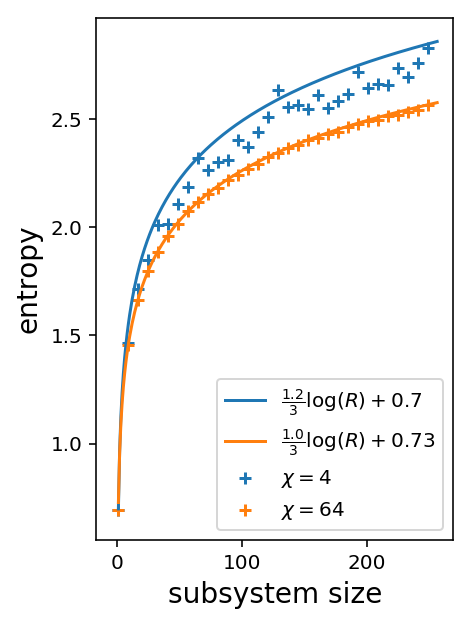

In [7]:
plt.figure(figsize=(3.2, 4.8))
for chi, data in entropies.groupby(['chi']):
    #if chi == 4: continue
    R = data['R']
    S = data['S']
    plt.scatter(R[::8], S[::8], marker='+', label=f'$\chi={chi}$')

    # A log(R) + B = S
    A, B = np.polyfit(np.log(R), S, 1)
    plt.plot(
        R,
        A * np.log(R) + B,
        label=f'$\\frac{{{3*A:.2}}}{{3}}\log(R) + {B:.2}$')
    print(A, B)

plt.legend()
plt.xlabel('subsystem size', fontsize=14)
plt.ylabel('entropy', fontsize=14)

plt.savefig('entropies1d.pdf', bbox_inches='tight')

Cardy tells us that $S(R) = \frac c3 \ln \frac\ell a + c_1'$.

In [8]:
# S(R) = A * np.log(R) + B
c = A * 3
c

0.9998198193411028

This is indeed very close to what we expect ($c=1$).